<a href="https://colab.research.google.com/github/1900690/image-editing/blob/main/%E7%94%BB%E5%83%8F%E3%83%AA%E3%82%B5%E3%82%A4%E3%82%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#@title 画像を取得
import shutil
import os

file_name ="OK.zip"

if os.path.exists('/content/foward'):
    shutil.rmtree("/content/foward")

#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
os.rename('/content/'+os.path.splitext(file_name)[0]+'/', '/content/foward/')
#zipを消す
os.remove('/content/'+file_name)

In [12]:
import os

folder_path = r'/content/foward'  # 置換対象のファイルが存在するフォルダのパス
old_text = ').jpg'  # 置換前のテキスト
new_text = ')'  # 置換後のテキスト

for filename in os.listdir(folder_path):
    if old_text in filename:
        new_filename = filename.replace(old_text, new_text)
        os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))

In [13]:
#@markdown 作ったファイルをダウンロード
import shutil
import os

shutil.make_archive('/content/OK', 'zip', '/content/foward')

'/content/OK.zip'

In [ ]:
#@title 関数定義
import cv2
from IPython.display import Image, display


def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。"""
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))

def scale_box(img, width, height):
    """指定した大きさに収まるように、アスペクト比を固定して、リサイズする。"""
    h, w = img.shape[:2]
    aspect = w / h
    if width / height >= aspect:
        nh = height
        nw = round(nh * aspect)
    else:
        nw = width
        nh = round(nw / aspect)

    dst = cv2.resize(img, dsize=(nw, nh))

    return dst


(251, 275, 3) -> (584, 640, 3)


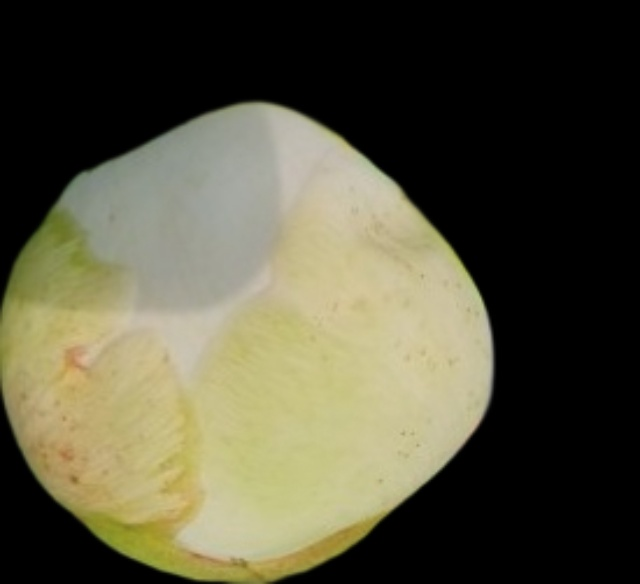

In [ ]:
# 指定した大きさに収まるようにリサイズする。
import glob
import os
import csv
import pprint
import cv2

if os.path.exists("/content/result"):
  shutil.rmtree("/content/result")
if os.path.exists("/content/sample_writer_row.csv"):
  os.remove("/content/sample_writer_row.csv")


os.makedirs('/content/result')

with open('/content/sample_writer_row.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["name","Width","Height","x1","y1","x2","y2"])

file_list = sorted(glob.glob('/content/foward/*.png'))

for file_name in file_list:
  img = cv2.imread(file_name)
  dst = scale_box(img, 640, 640)
  cv2.imwrite('/content/result/'+os.path.basename(file_name), dst)

  with open('/content/sample_writer_row.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerows([[os.path.basename(file_name),dst.shape[0],dst.shape[1],1,1,dst.shape[:2][1]-1,dst.shape[:2][0]-1]])

print(f"{img.shape} -> {dst.shape}")
imshow(dst)

In [ ]:
#@markdown 作ったファイルをダウンロード
import shutil
import os

shutil.make_archive('/content/result', 'zip', '/content/result')

'/content/result.zip'